In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement= Base.classes.measurement
Station=Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
most_recent_date=session.query(func.max(Measurement.date)).scalar()
print (most_recent_date)

2017-08-23


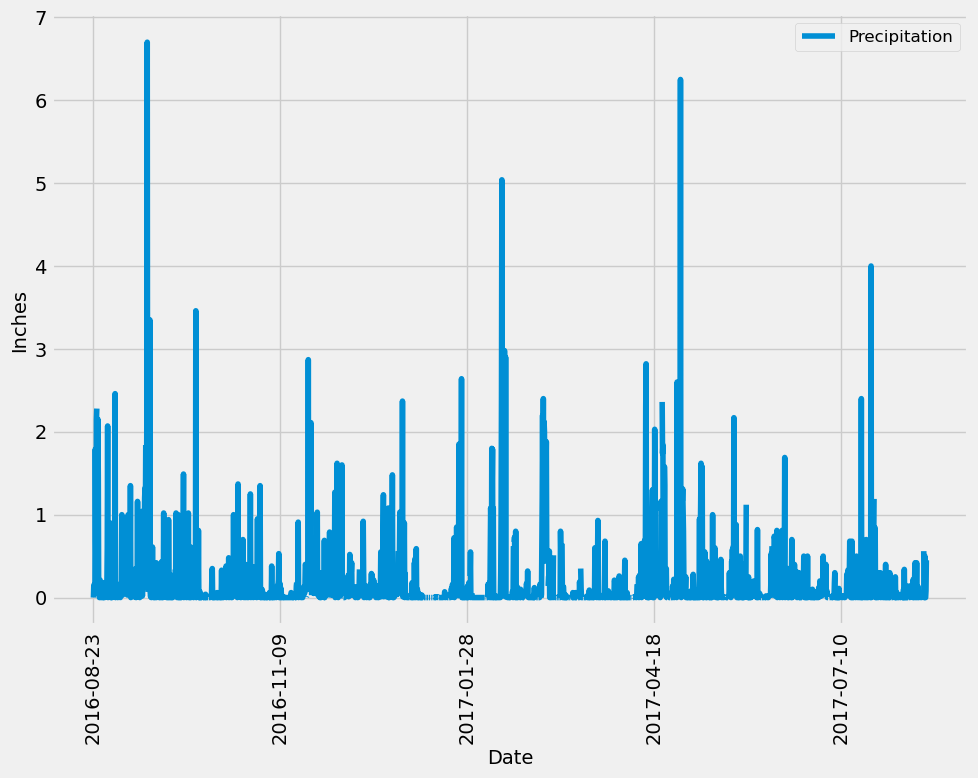

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year=dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_year
# Perform a query to retrieve the data and precipitation scores and # Sort the dataframe by date
last_year = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-23').\
filter(Measurement.date <= '2017-08-23').\
order_by(Measurement.date).all()

#Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_dataframe=pd.DataFrame(last_year, columns=['Date', 'Precipitation'])
precipitation_dataframe_clean= pd.DataFrame(data=precipitation_dataframe).set_index("Date")
precipitation_dataframe_clean.head()

#plot the data using pandas
precipitation_dataframe_clean.plot(figsize = (10, 8), alpha = 1.0)
plt.xticks(rotation=90)
plt.legend(loc="upper right", fontsize=12)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [95]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_stats=precipitation_dataframe_clean.describe()
precipitation_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [97]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(Station.name).count()
total_stations

9

In [119]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
total_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 

total_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [123]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station=total_active_stations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

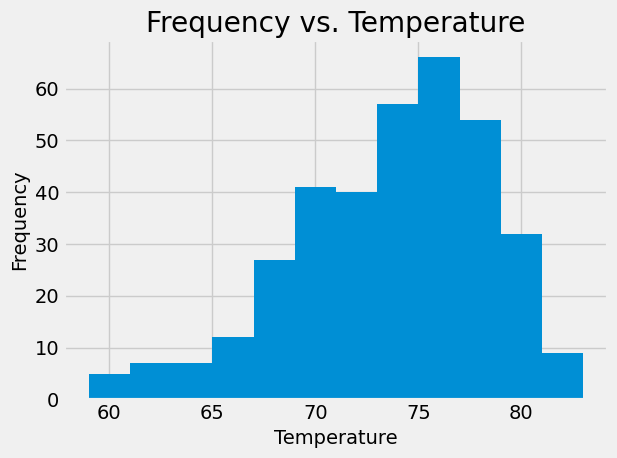

In [161]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_station= session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date.desc()).first()
most_recent_station

last_twelve_months = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date > '2016-08-17').all()

last_twelve_df= pd.DataFrame(last_twelve_months)
last_twelve_df

last_twelve_df.hist(bins=12)
plt.title("Frequency vs. Temperature")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()